In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math
import plotly.express as px
import pandas as pd
import numpy as np

## 1. Load the Karate Graph from NetworkX

In [ ]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Available nodes:", list(graph.nodes))
    print("Available edges:", list(graph.edges))
    if type(graph) == nx.classes.digraph.DiGraph:
        print("Connected components:",
              list(nx.weakly_connected_components(directed_graph)))
    else:
        print("Connected components:", list(nx.connected_components(graph)))
    print("Node degree:", dict(graph.degree()))

In [ ]:
# built-in graph from networkx
karate_graph = nx.karate_club_graph()
get_graph_info(karate_graph)

Number of nodes: 34
Number of edges: 78
Available nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Available edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
Connected components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

 ## More about the karate club dataset

 1. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club.
 2.  During the study a conflict arose between the administrator:
  "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate.

In [ ]:
# club color reference
nation_color_dict = {
    'Mr. Hi': '#aff8df',
    'Officer': '#ffcbc1'
}

# function to assign color for node visualization
def create_node_colors_from_graph(graph, club_color_dict):
    node_colors = []
    for node, club in list(graph.nodes(data="club")):
        if club in club_color_dict:
            node_colors.append(club_color_dict[club])
    return node_colors

# get node colors for plotting
node_colors = create_node_colors_from_graph(karate_graph, nation_color_dict)

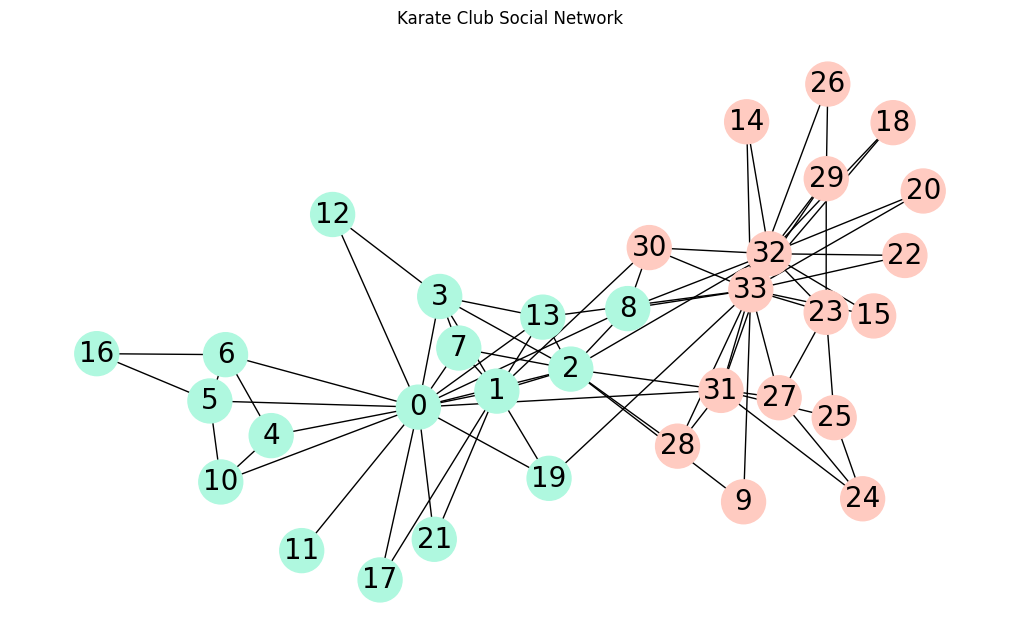

In [ ]:
# create visualization
pos = nx.spring_layout(karate_graph,
                       k=0.3, iterations=50,
                       seed=2)

plt.figure(1,figsize=(10,6))
nx.draw(karate_graph,
        pos = pos,
        node_color=node_colors,
        node_size=1000,
        with_labels=True,
        font_size = 20,
        font_color='black')
plt.title("Karate Club Social Network")
plt.show()

### Mint color nodes are from the "Mr. Hi" Karate club and the Salmon color nodes are from the "Officer" Karate club.

## Community Detection

### 2.0 Modularity:

* Modularity is widely used as a measure for how good a clustering is.  
* Modularity compares the number of edges inside a cluster with the expected number of edges that one would find in the cluster.
* A good modularity score falls within 0.3-0.7.
* When modularity is close to 1, it indicates strong community structure.
* When modularity is 0, it indicates the community division is worse than random.

Modularity suffers a resolution limit and, therefore, it is unable to detect small communities.


1. Definition:
![image-2.png](attachment:image-2.png)

In [ ]:
import networkx.algorithms.community as nx_comm


In [ ]:
# function to return a node's neighbor nodes as a list
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]

In [ ]:
# function to return the subgraph containing 2 nodes' common neighbors
def get_common_neighbor_subgraph(graph, source, target):
    nodes = [source, target] + list(nx.common_neighbors(karate_graph, source, target))
    return graph.subgraph(nodes)

In [ ]:
# function create node color list for less than 7 communities
# when there are more than 6 colors, visualization can be confusing for human
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"][:number_of_colors]
    node_colors = []

    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [ ]:
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph,
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6))
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show()

In [ ]:
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Community Partition Subgraph"
    pos = nx.spring_layout(subgraph,
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6))
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show()

### 2.3 Louvain:

1. Definition: a community detection algorithm based on optimization of modularity
    
* **Modularity Gain**:
Then for each node i, the change in modularity is calculated for removing i from its own community and moving it into the community of each neighbor j of i. This value is easily calculated by two steps:
(1) removing i from its original community, and
(2) inserting i to the community of j. The two equations are quite similar.
Read more here: https://en.wikipedia.org/wiki/Louvain_method
    
2. How to:  
   * **Initialization**: each node in the network is assigned to its own community.  
   * **Phase 1 Local moving of nodes**: iterates all the nodes and experiment with adding single node to other communities to maximize the modularity gain until no modularity gain can be improved. Once this local maximum of modularity is hit, the first phase has ended.  
   * **Phase 2 Aggregation of the network**: groups all of the nodes in the same community and builds a new network where nodes are the communities from the previous phase. Any links between nodes of the same community are now represented by self-loops on the new community node and links from multiple nodes in the same community to a node in a different community are represented by weighted edges between communities. Once the new network is created, the second phase has ended and the first phase can be re-applied to the new network.

![image-3.png](attachment:image-3.png)

**Advantages**:
1. Fast in O(nlogn) time
2. Louvain provides two guarantees: no communities can be merged & no nodes can be moved.

**Disadvantages**:
1. Use of storage of the network in the main memory.
2. Louvain algorithm does not guarantee connectivity
3. Tendency to discover communities that are internally disconnected (badly connected communities)
4. Doesn’t guarantee well-connected communities
5. Louvain has no mechanism for fixing badly connected communities.
6. DIstribution of the badly connected communities will not improve overtime


In [ ]:
import community as community_louvain

In [ ]:
# convert the python-louvain package output to
# NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    # Find the best partition using the Louvain algorithm
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    #print("louvain_partition_dict:", louvain_partition_dict)
    # Get unique community labels
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    #print("unique_partition_labels:",unique_partition_labels)
    # Initialize a list of lists to store communities
    communities = [[] for i in range(len(unique_partition_labels))]
    # Iterate through nodes and add them to the corresponding community list
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities


In [ ]:
# get communities using louvain algorithm
louvain_communities = get_louvain_communities(karate_graph, random_state=1)
louvain_communities

[[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21],
 [4, 5, 6, 10, 16],
 [24, 25, 28, 31],
 [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]]

In [ ]:
# find the modularity

modularity = nx_comm.modularity(karate_graph, louvain_communities)
print(f"Modularity using Louvain communities: {modularity}")

Modularity using Louvain communities: 0.4438541256723075


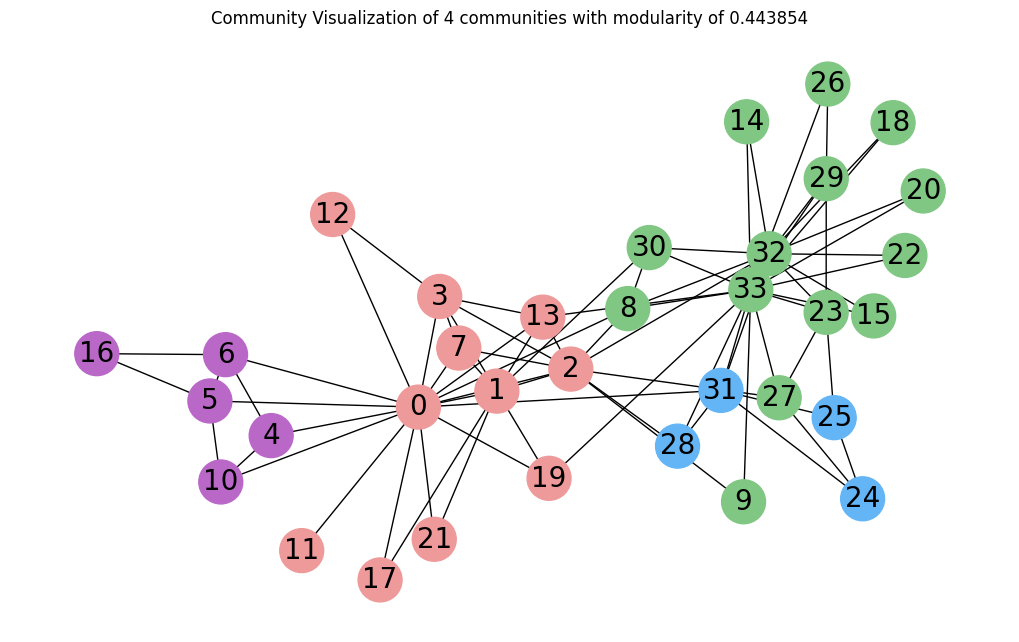

In [ ]:
visualize_communities(karate_graph, louvain_communities)

Louvain algoirithm obtained the modularity score of 0.443845. Let's visualize the subgraphs for the communities.

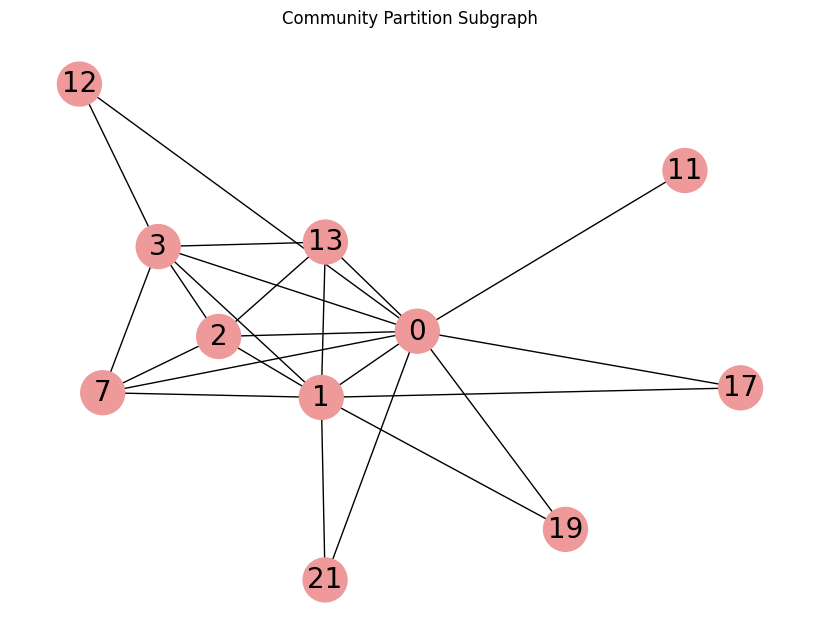

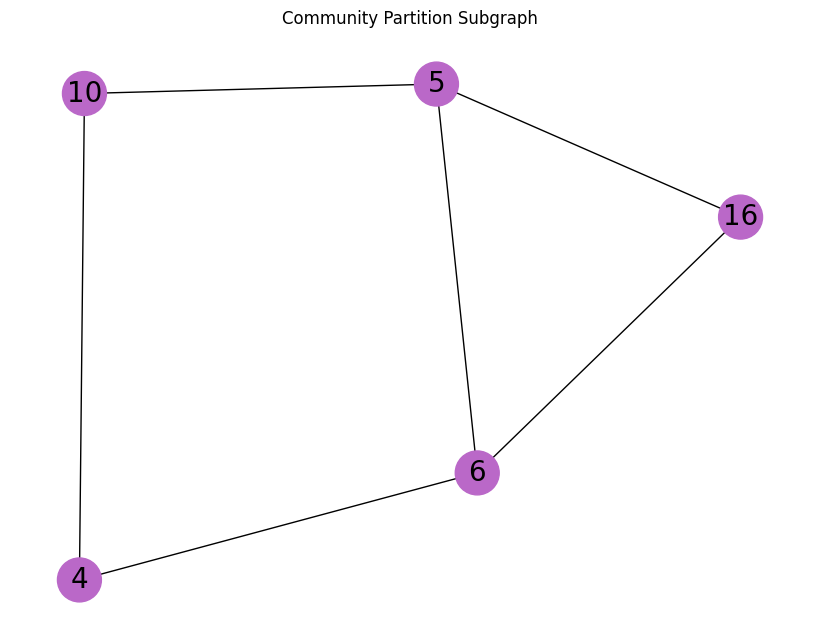

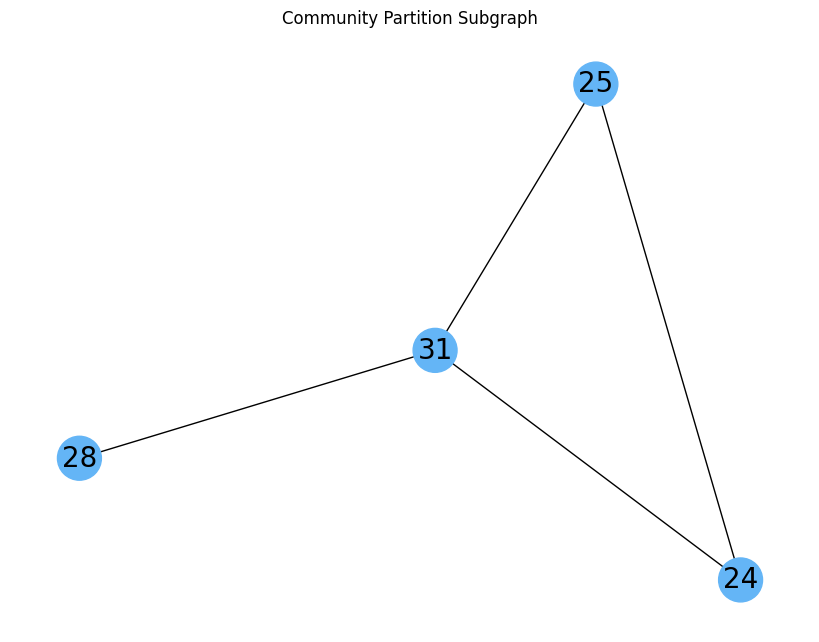

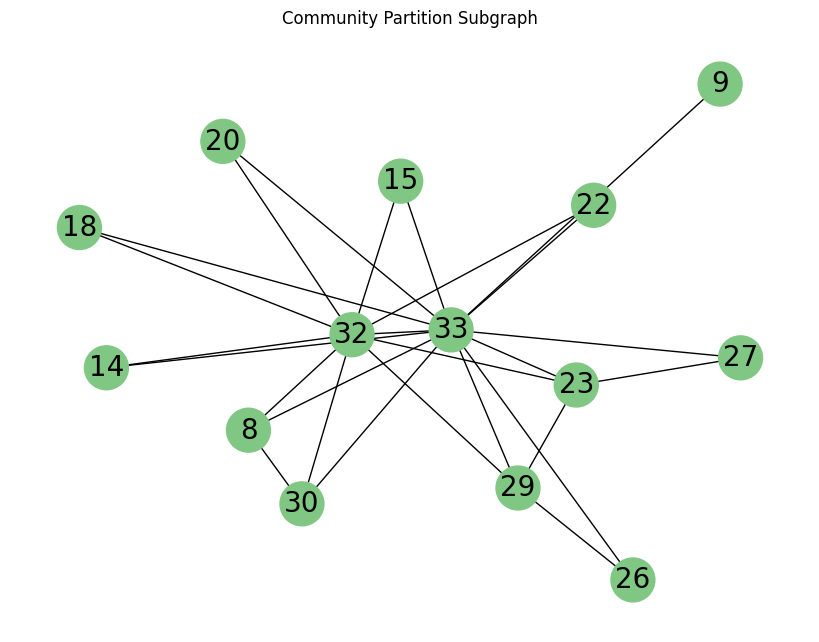

In [ ]:
colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784", "#FFF176", "#BDBDBD"]
for i in range(len(louvain_communities)):
    visualize_subgraph(karate_graph, louvain_communities[i], colors[i])

### 2.4 Leiden:

1. Definition: a community detection algorithm based on optimization of modularity with refinement for partitions. Leiden is the most recent major development in this space, and highlighted a flaw in the original Louvain algorithm.
    
* **Modularity Gain**:
Then for each node i, the change in modularity is calculated for removing i from its own community and moving it into the community of each neighbor j of i. This value is easily calculated by two steps:
(1) removing i from its original community, and
(2) inserting i to the community of j. The two equations are quite similar.
    
2. Brief how to:  
   * **Initialization**: each node in the network is assigned to its own community.  
   * **Phase 1 Fast local moving of nodes**: iterates all the nodes and experiment with adding single node to other communities to maximize the modularity gain until no modularity gain can be improved. Once this local maximum of modularity is hit, the first phase has ended. The **difference** is *only nodes whose neighborhood has changed are visited after 2nd iteration* whereas *Louvain keeps visiting all nodes in the network*.  
   * **Phase 2 Refinement of the partitions**: Initially,  partition P_refined is set to a singleton partition, in which each node is in its own community. The algorithm then locally merges nodes in P_refined: nodes that are on their own in a community in  P_refined can be merged with a different community. Importantly, mergers are performed only within each community of the partition P. In addition, a node is merged with a community in P_refined only if both are sufficiently well connected to their community in P. After the refinement phase is concluded, communities in P often will have been split into multiple communities in P_refined , but not always.
   * **Phase 3 Aggregation of the network based on refinement**: aggregation of the network is based on the refined partition, using the non-refined partition to create an initial partition for the aggregate network.

**Read more here for the original paper published on Nature**: https://www.nature.com/articles/s41598-019-41695-z

![image.png](attachment:f76e57a6-3768-4622-ae0c-17296e6a37a2.png)

**Advantages**:
1. Guarantees that communities are connected with better quality partitions
2. Better community detection with less badly connected communities
3. Faster local moving phase only visits nodes with neighbors changed after 2nd iterations


**Comparison of the two algorithms on large network datasets:**  
![image.png](attachment:71639001-fd27-428b-a65e-13b0be97a355.png)

**Comparison of the two algoirthms for max modularity on large network datasets:**  
![image.png](attachment:aaaa5379-09e1-46a7-b947-15258cd9d961.png)

**Comparison of community connectivity after 4 iterations:**  
![image.png](attachment:e93b0c75-cd6a-46fb-a9ca-a54fe831a5e8.png)


**Disadvantages**:
1. Complex and hard to implement, but it’s available on Github written by the authors here: https://github.com/vtraag/leidenalg

In [ ]:
!pip install leidenalg python-igraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.2 MB/s eta 0:00:00


In [ ]:
import leidenalg
import igraph as ig

In [ ]:
# because it's originally implemented in i-graph, we need to convert NetworkX graph to i-graph to
# use the original implementation
temp_graph = ig.Graph.from_networkx(karate_graph)

#### parameters for the original implementation of the leiden algorithm function
    Signature:
    leidenalg.find_partition(
        graph,
        partition_type,
        initial_membership=None,
        weights=None,
        n_iterations=2,
        max_comm_size=0,
        seed=None,
        **kwargs,
    )

In [ ]:
# function to obtain the communities calculated by leiden algorithm
def get_leiden_communities(graph, random_state=0):
    # Removed deprecated and removed graph types from the isinstance check
    if isinstance(graph, (nx.Graph, nx.DiGraph)):
        graph = ig.Graph.from_networkx(graph)
    return list(leidenalg.find_partition(graph,
                                         partition_type=leidenalg.ModularityVertexPartition,
                                         seed=random_state))

In [ ]:
# get communities using leiden algorithm
leiden_communities = get_leiden_communities(karate_graph)
leiden_communities

[[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33],
 [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21],
 [23, 24, 25, 27, 28, 31],
 [4, 5, 6, 10, 16]]

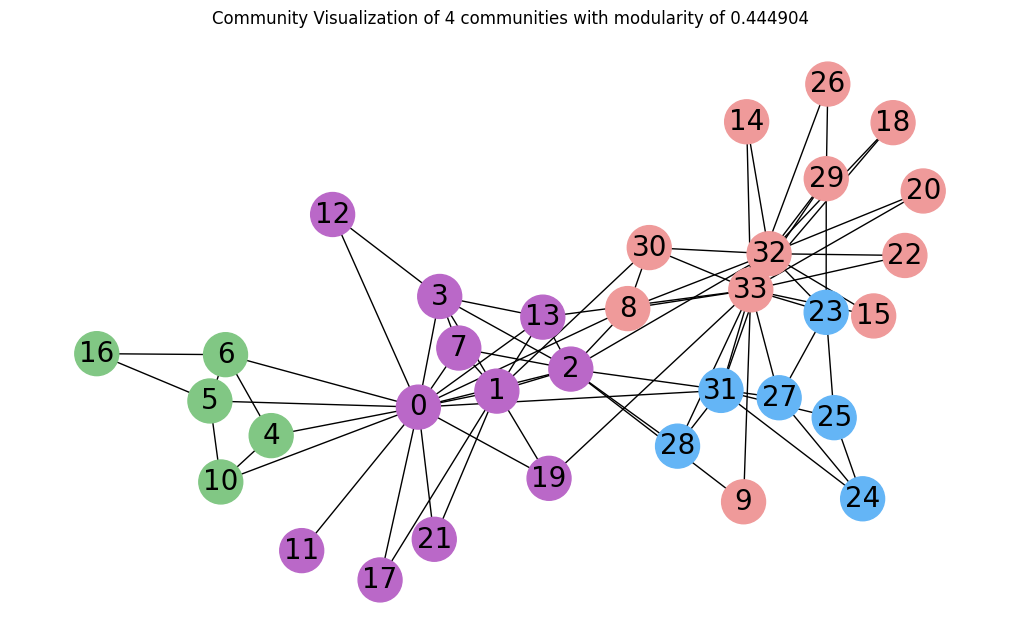

In [ ]:
visualize_communities(karate_graph, list(leiden_communities))

### The modularity of the partition is the same as the Louvain algorithm for this small network and the partitions are the same except the labeling is different. If you look at the subgraph below, the partitions are the same as what Louvain has determined. Leiden will perform better on large network with less runtime and guarantte connected communities with better quality. Use Leiden to run real world large network community detections.

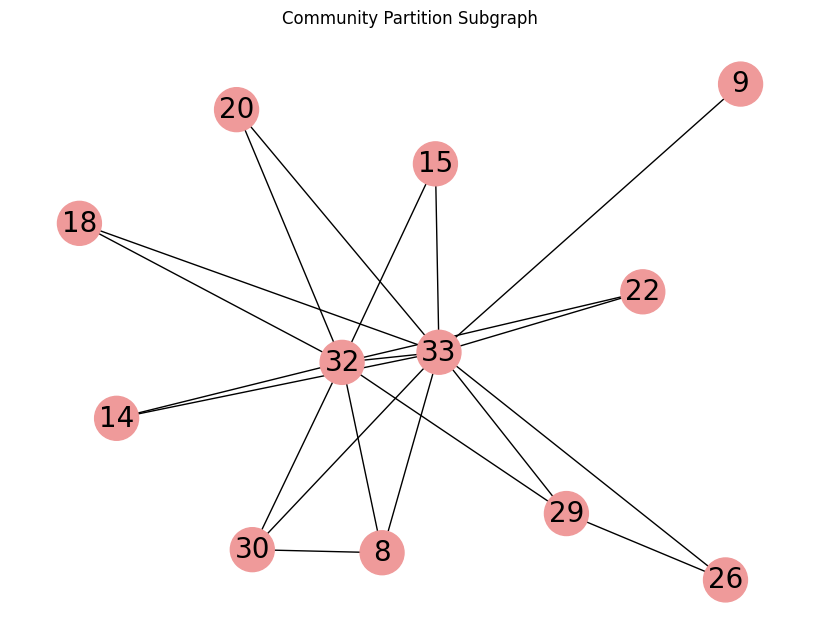

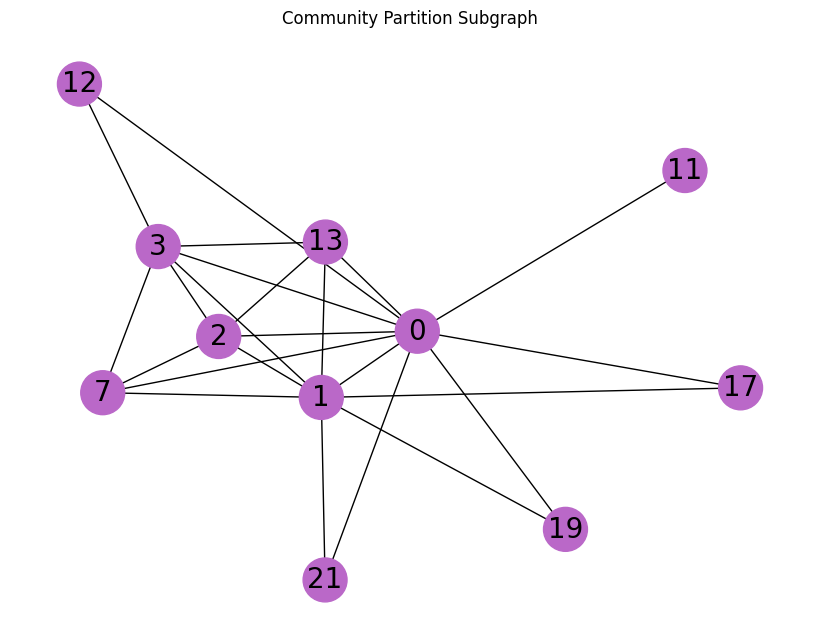

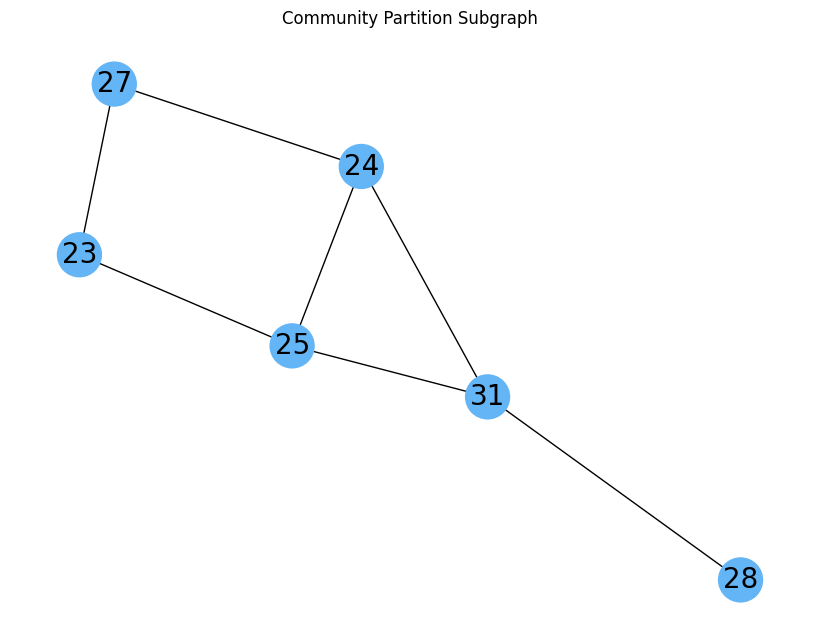

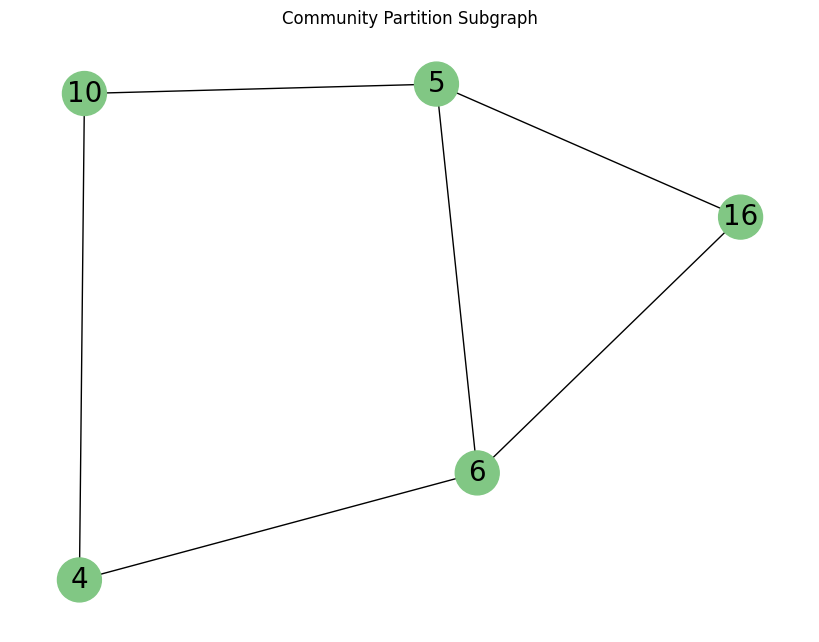

In [ ]:
colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784", "#FFF176", "#BDBDBD"]
for i in range(len(list(leiden_communities))):
    visualize_subgraph(karate_graph, list(leiden_communities)[i], colors[i])